In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
reddit = pd.read_csv('reddit_data_example.csv')
reddit.head()

,Date,Domain,Sentiment,Language,Author,Thread Entry Type,Reddit Author Awardee Karma,Reddit Author Awarder Karma,Reddit Author Karma,Reddit Comments,Reddit Score,Reddit Score Upvote Ratio
0,2/9/2023 20:12,reddit.com,neutral,en,AutoModerator,reply,2397363,0,2000,NaN,1,NaN
1,2/9/2023 17:42,reddit.com,neutral,en,AutoModerator,reply,2397218,0,2000,NaN,1,NaN
2,2/9/2023 17:41,reddit.com,neutral,en,AutoModerator,reply,2397218,0,2000,NaN,1,NaN
3,2/8/2023 22:12,reddit.com,negative,en,KaylaST,reply,110,14,1470,NaN,1,NaN
4,2/8/2023 20:15,reddit.com,negative,en,CaveLady3000,post,311,73,4148,0.0,1,1.0


In [3]:
reddit.shape

(8137, 12)

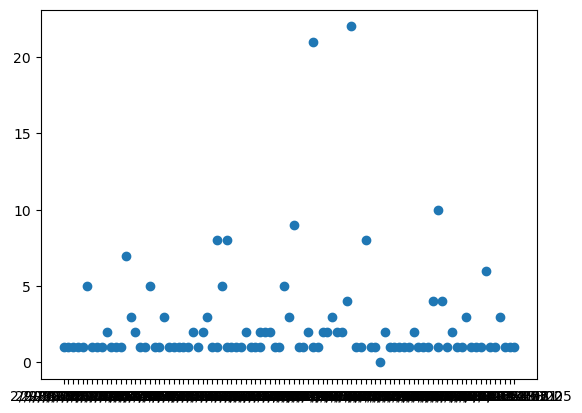

In [5]:
fig1, ax1 = plt.subplots()
ax1.scatter(reddit['Date'][0:100], reddit['Reddit Score'][0:100])
plt.show()

In [6]:
reddit['datetime'] = pd.to_datetime(reddit['Date'])
reddit['datetime'].describe()

count                             8137
mean     2021-01-23 20:13:32.444389632
min                2017-06-20 00:01:00
25%                2020-04-24 13:16:00
50%                2020-09-07 18:14:00
75%                2021-11-29 14:46:00
max                2023-02-09 20:12:00
Name: datetime, dtype: object

In [12]:
reddit['datetime'].iloc[0].year

2023

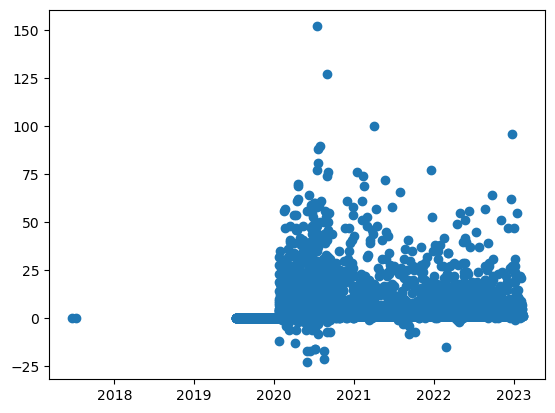

In [13]:
fig2, ax2 = plt.subplots()
ax2.scatter(reddit['datetime'], reddit['Reddit Score'])
plt.show()

In [ ]:
reddit['datetime'][0]

In [18]:
reddit['datetime'].dt

In [19]:
reddit['datetime'].dt.date[0]

datetime.date(2023, 2, 9)

In [20]:
reddit_count_by_day = reddit.groupby(reddit['datetime'].dt.date)['Reddit Score'].count()

In [22]:
reddit_count_by_day[0:10]

datetime
2017-06-20     1
2017-07-08     1
2019-07-09     4
2019-07-10     2
2019-07-11     1
2019-07-12     1
2019-07-14     4
2019-07-15     2
2019-07-16    10
2019-07-17    10
Name: Reddit Score, dtype: int64

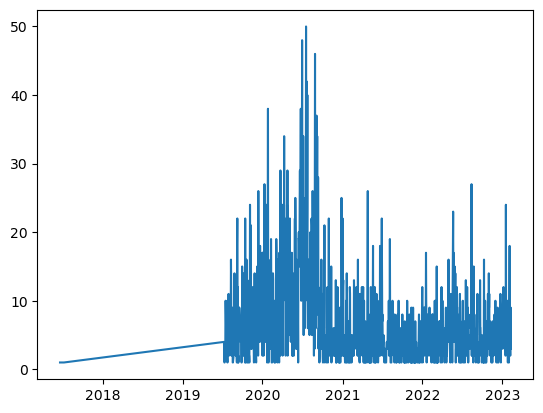

In [23]:
fig3, ax3 = plt.subplots()
ax3.plot(reddit_count_by_day.index, reddit_count_by_day)
plt.show()

In [24]:
reddit_count_by_day.index.min(), reddit_count_by_day.index.max()

(datetime.date(2017, 6, 20), datetime.date(2023, 2, 9))

In [25]:
date_range = pd.date_range(start = '2017-06-20', end = '2023-02-09', freq='D')

In [27]:
rds = pd.Series(reddit_count_by_day, index = date_range)
rds.head()

2017-06-20    1.0
2017-06-21    NaN
2017-06-22    NaN
2017-06-23    NaN
2017-06-24    NaN
Freq: D, Name: Reddit Score, dtype: float64

In [28]:
rds.mean()

6.889923793395428

In [29]:
rds_mean_fill = rds.fillna(6.8899)

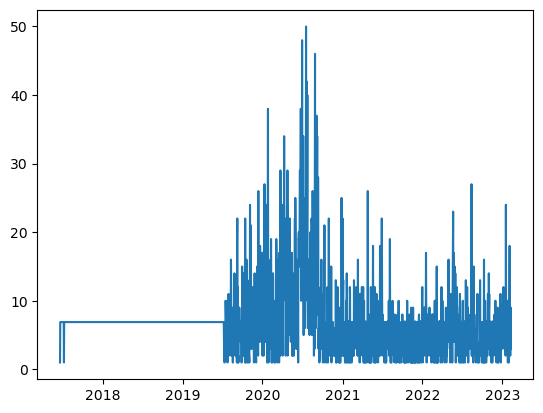

In [30]:
fig4, ax4 = plt.subplots()
ax4.plot(rds_mean_fill.index, rds_mean_fill)
plt.show()

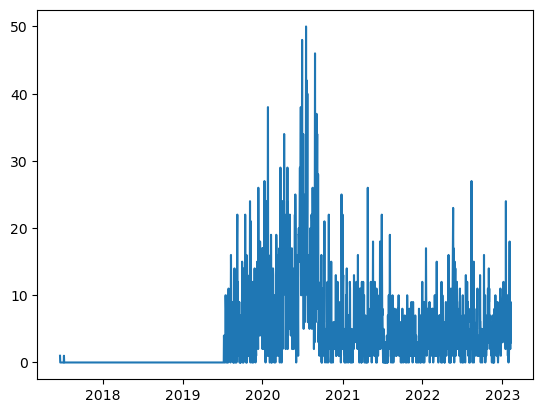

In [31]:
rds_zero_fill = rds.fillna(0)
fig5, ax5 = plt.subplots()
ax5.plot(rds_zero_fill.index, rds_zero_fill)
plt.show()

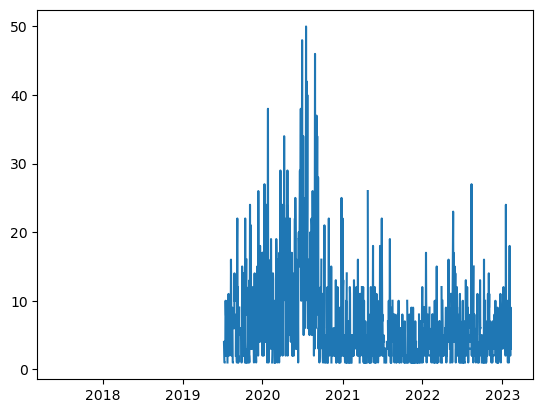

In [32]:
fig6, ax6 = plt.subplots()
ax6.plot(rds.index, rds)
plt.show()

In [36]:
reddit_sample = reddit.sample(1000)

In [37]:
samp_counts = reddit_sample.groupby(reddit_sample['datetime'].dt.date)['Reddit Score'].count()
rds_samp = pd.Series(samp_counts, index = date_range)

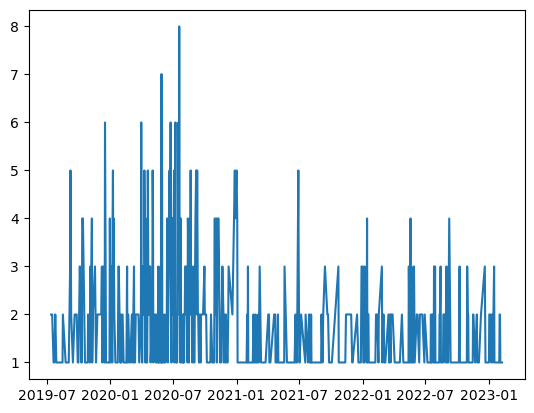

In [38]:
fig7, ax7 = plt.subplots()
ax7.plot(rds_samp.index, rds_samp.interpolate(method = 'time'))
plt.show()